**Netflix Content Analysis: Exploring Genre Trends, Popularity, and Global Distribution**

**Introduction:**

In today’s digital entertainment landscape, Netflix has become a global leader in on-demand streaming, offering thousands of movies and TV shows across different genres, languages, and regions. With an ever-growing catalog, understanding the patterns and trends in Netflix’s content can reveal valuable insights into audience preferences, global entertainment diversity, and strategic content direction.

This project performs a comprehensive exploratory data analysis (EDA) of the Netflix Titles Dataset to uncover meaningful insights about the platform’s offerings — from the dominance of certain genres and content types to the distribution of titles across regions and years.

**Business Problem**

As the streaming industry grows increasingly competitive, data-driven decision-making is critical for content platforms like Netflix. Understanding what types of content attract viewers, which genres are expanding, and which regions produce the most content can help Netflix (or similar OTT services) in:

1.   Deciding where to invest in new productions,
2.   Localizing content strategies
1.   Identifying trends that appeal to different audience segments.


**Problem Statement:-** How can we use data analysis to uncover content trends, genre preferences, and regional patterns within Netflix’s global catalog of movies and TV shows?

**Objectives:-**
1.   To explore and visualize Netflix’s content based on type, genre, and release year.
2.   To identify the most popular directors, actors, and genres featured on Netflix.
1.   To analyze the regional distribution of content and understand which countries dominate the platform.
2.   To examine content trends over time, identifying growth patterns and shifts in production.




**Goal:**

The goal of this project is to gain a deep understanding of Netflix’s content structure through detailed data exploration and visualization. By leveraging powerful analytical tools such as Pandas, Matplotlib, and Seaborn, the project aims to present findings in a clear, visual, and easily interpretable format. It focuses on uncovering actionable insights into genre trends, popular directors and actors, and the regional distribution of content across Netflix’s global catalog. Ultimately, this analysis is designed to serve as a portfolio-ready data project that highlights strong skills in exploratory data analysis (EDA), visualization, and storytelling using real-world data.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')


In [3]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This function provides a concise summary of the dataset, including the number of entries (rows), column names, data types, and the count of non-null (non-missing) values in each column. It helps quickly understand the overall structure and completeness of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


This function generates summary statistics of the dataset’s numerical columns, such as count, mean, standard deviation, minimum, maximum, and quartile values. It helps understand the central tendency, spread, and overall distribution of the data.

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.shape
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Handling Missing Values**

Handling missing values is an essential step to ensure the dataset’s accuracy, consistency, and reliability before performing analysis. In this process, the code first identifies columns containing missing entries and then applies appropriate strategies to handle them. For numerical columns, missing values are replaced with the median to preserve the overall data distribution without being influenced by extreme values. For categorical columns, missing entries are filled with the most frequent (mode) value or labeled as “Unknown” when no clear mode exists. Additionally, rows containing an excessive number of missing values are removed to maintain dataset quality. This cleaning process ensures that the data is complete and ready for meaningful analysis and visualization.

In [8]:
# Handle Missing Values

print(" Handling Missing Values...")

# Check missing values
missing_summary = df.isnull().sum()
print("Missing values before cleaning:\n", missing_summary[missing_summary > 0])

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown")

# Optionally drop rows with too many missing values
df = df.dropna(thresh=len(df.columns) * 0.6)

print(" Missing values handled.")


 Handling Missing Values...
Missing values before cleaning:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64
 Missing values handled.


This step converts the ‘date_added’ column from string format to a proper datetime format, allowing easier extraction of year, month, and time-based trends. Converting it ensures accurate time-based analysis and visualization later in the project.

In [9]:
# Convert 'date_added' column to datetime

print(" Converting 'date_added' column to datetime...")

if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    print(" 'date_added' converted to datetime.")
else:
    print(" 'date_added' column not found. Skipping date conversion.")


 Converting 'date_added' column to datetime...
 'date_added' converted to datetime.


In this step, new columns — ‘year_added’ and ‘month_added’ — are created from the existing ‘date_added’ column. These features help analyze how Netflix’s content has evolved over time by allowing trend analysis based on the year and month when titles were added to the platform.

In [10]:
# Create new columns: year_added, month_added

print(" Creating new time-based features...")

if 'date_added' in df.columns:
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
    print(" Created 'year_added' and 'month_added' columns.")
else:
    print(" Cannot create time features — 'date_added' missing.")


 Creating new time-based features...
 Created 'year_added' and 'month_added' columns.


In [11]:
# Remove Duplicates

print(" Removing duplicate records...")

initial_rows = len(df)
df = df.drop_duplicates()
removed_rows = initial_rows - len(df)

print(f" Removed {removed_rows} duplicate rows.")


 Removing duplicate records...
 Removed 0 duplicate rows.


This step provides a final overview of the cleaned dataset after all preprocessing steps. By displaying the dataset’s structure using df.info() and previewing the first few rows with df.head(), we verify that data types, columns, and values are correctly formatted and ready for analysis.

In [12]:
# Final Check

print(" Final Dataset Overview:")
display(df.info())
display(df.head())


 Final Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8719 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8719 non-null   float64       
 13  month_added   8719 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory u

None

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


This visualization shows the distribution of Movies and TV Shows available on Netflix. Using a count plot, we can easily compare the number of titles in each category, helping us understand whether Netflix’s catalog is more focused on movies or television content.

/tmp/ipython-input-784642597.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


Text(0.5, 1.0, 'Movies vs TV Shows on Netflix')

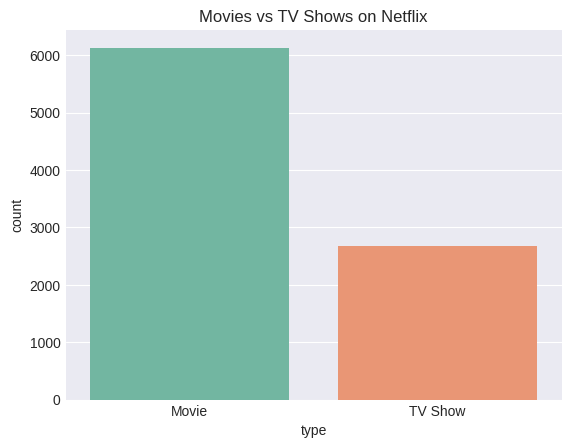

In [13]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')


This line chart illustrates the number of Netflix titles released each year. By plotting release years against the count of titles, we can observe how Netflix’s content production and acquisitions have evolved over time, highlighting periods of significant growth or decline in releases.

Text(0.5, 1.0, 'Number of Titles Released per Year')

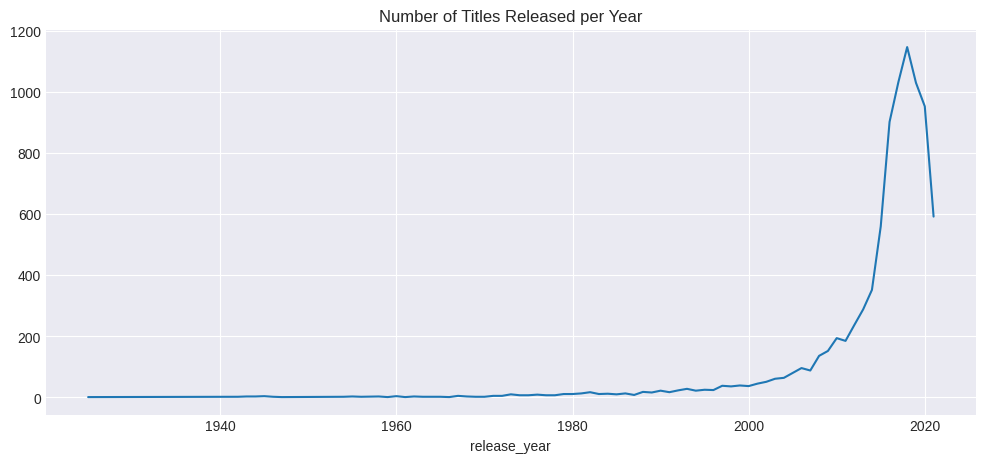

In [14]:
trend = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=trend.index, y=trend.values)
plt.title('Number of Titles Released per Year')

This bar chart displays the top 10 most common genres available on Netflix. By counting the frequency of each genre listed in the dataset, we can identify which types of content dominate the platform — such as Drama, Comedy, or Documentaries — providing insights into Netflix’s primary focus areas and audience preferences.

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

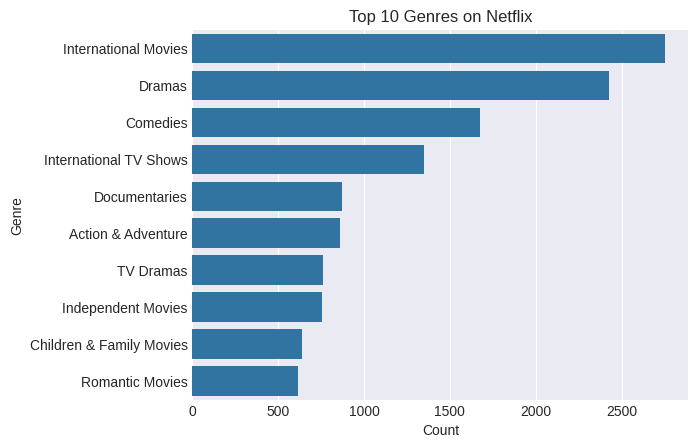

In [18]:
from collections import Counter

genre_counts = Counter(', '.join(df['listed_in'].dropna()).split(', '))
# Create a DataFrame with explicit column names
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('Top 10 Genres on Netflix')

This pie chart illustrates the top 10 most frequently featured actors on Netflix, showing their percentage share based on the number of titles they appear in. The visualization helps highlight which actors have the strongest presence on the platform and provides insights into casting trends within Netflix’s content library.

Visualizing the Top 10 Actors on Netflix using a Pie Chart...


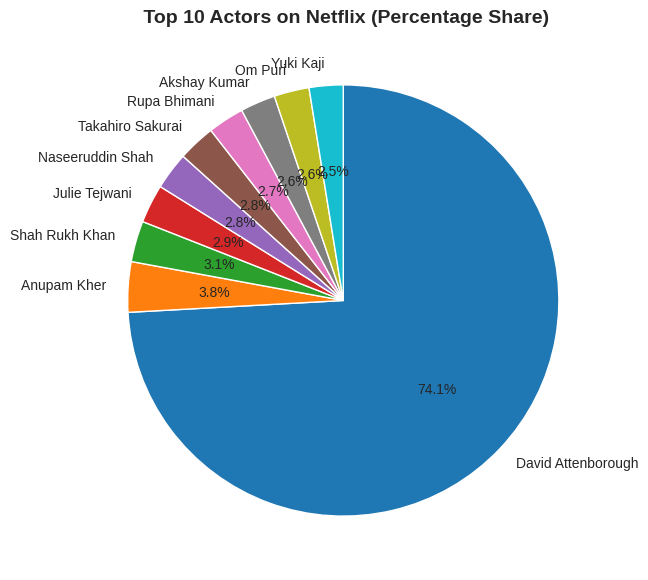

In [22]:
print("Visualizing the Top 10 Actors on Netflix using a Pie Chart...")

# Extract and count top actors
actors = df['cast'].dropna().str.split(', ').explode()
top_actors = actors.value_counts().head(10)

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(
    top_actors.values,
    labels=top_actors.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)

# Add title
plt.title(" Top 10 Actors on Netflix (Percentage Share)", fontsize=14, weight='bold')
plt.show()


In [27]:
!pip install squarify

This treemap visualizes the top 10 countries contributing the most content to Netflix’s catalog. Each rectangle’s size represents the number of titles produced by that country, making it easy to compare content distribution globally. The visualization highlights which regions — such as the United States, India, or the United Kingdom — dominate Netflix’s production landscape.

 Visualizing the Top 10 Countries Producing Netflix Titles as a Treemap...


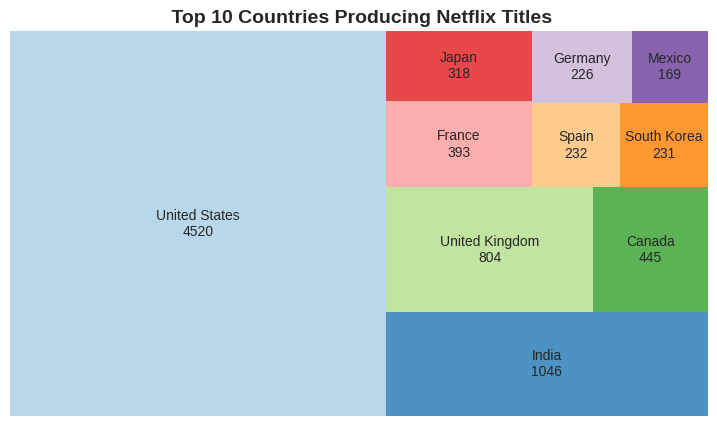

In [29]:
import squarify
print(" Visualizing the Top 10 Countries Producing Netflix Titles as a Treemap...")

# Count top 10 countries
country_counts = df['country'].dropna().str.split(', ').explode().value_counts().head(10)

# Create Treemap
plt.figure(figsize=(9, 5))
squarify.plot(
    sizes=country_counts.values,
    label=[f"{c}\n{v}" for c, v in zip(country_counts.index, country_counts.values)],
    alpha=0.8,
    color=plt.cm.Paired.colors
)

plt.title(" Top 10 Countries Producing Netflix Titles", fontsize=14, weight='bold')
plt.axis("off")
plt.show()


This heatmap displays the correlation between numerical features in the dataset, such as release year or duration. Correlation values indicate the strength and direction of relationships between variables. Positive correlations suggest that as one feature increases, the other tends to increase as well, while negative correlations show an inverse relationship. This analysis helps identify potential dependencies or patterns among numeric attributes in Netflix’s dataset.

 Generating correlation heatmap between numerical features...


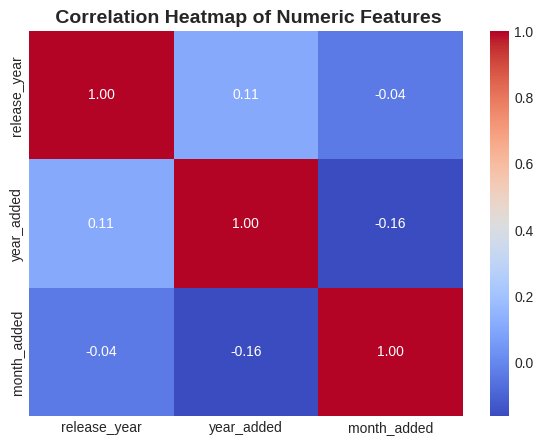

In [35]:
#  Bonus Analysis: Heatmap of Correlations (Year vs Rating)

print(" Generating correlation heatmap between numerical features...")

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

if not numeric_df.empty:
    plt.figure(figsize=(7, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(" Correlation Heatmap of Numeric Features", fontsize=14, weight='bold')
    plt.show()
else:
    print(" No numeric columns found for correlation heatmap.")


This WordCloud visually represents the most frequently occurring genres in Netflix’s catalog. Larger words indicate genres that appear more often in the dataset, making it easy to identify dominant categories such as Drama, Comedy, or Action at a glance. This visualization provides a quick and intuitive overview of the platform’s content focus areas.

 Generating WordCloud for Netflix genres/titles...


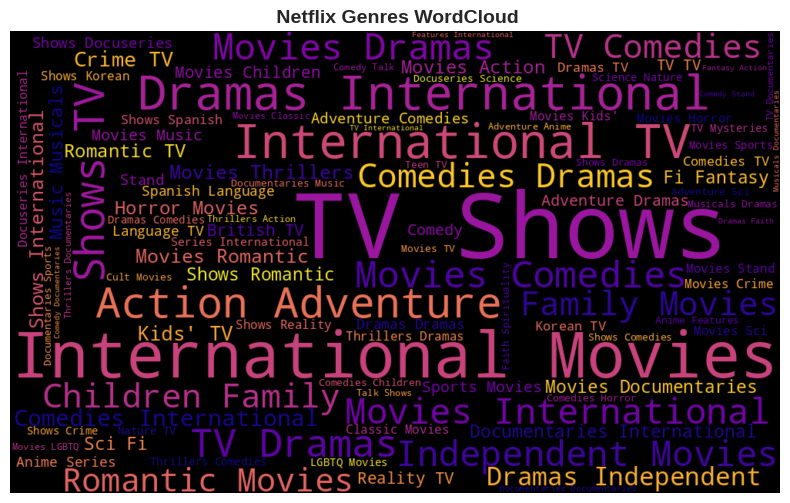

In [33]:
#  Bonus Analysis: WordCloud of Genres or Titles
from wordcloud import WordCloud
print(" Generating WordCloud for Netflix genres/titles...")
# Choose column (try 'listed_in' or 'title')
text_data = ' '.join(df['listed_in'].dropna())  # or df['title']
# Generate WordCloud
wordcloud = WordCloud(
    width=1000, height=600,
    background_color='black',
    colormap='plasma',
    max_words=100
).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" Netflix Genres WordCloud", fontsize=14, weight='bold')
plt.show()


**Business Insights**
1.   Movies dominate Netflix’s library, forming the majority of available content compared to TV Shows, indicating that Netflix still invests heavily in feature-length productions.
2.   Content production has increased significantly after 2015, reflecting Netflix’s aggressive expansion strategy and commitment to building a diverse, global catalog.
1.   Drama, Comedy, and Documentary emerged as the most prevalent genres, highlighting viewer demand for story-driven and realistic entertainment.
2.   List The United States, India, and the United Kingdom are the top contributors of Netflix titles, showing Netflix’s strong partnerships and focus on these markets.
1.   A few directors and actors appear frequently, indicating a trend of recurring collaborations and possibly stronger audience engagement with familiar creators.
2.   Most movies have moderate durations (around 90–120 minutes), aligning with audience preferences for concise and engaging content.





**Conclusion:-**

The analysis of Netflix’s Movies and TV Shows dataset provides a comprehensive understanding of the platform’s content distribution, evolution, and strategic direction. By exploring various dimensions such as content type, release trends, genres, and regional representation, we gain valuable insights into how Netflix has shaped its global entertainment portfolio over the years.

The findings reveal that Movies form the majority of Netflix’s content library, although the presence of TV Shows has been steadily increasing — reflecting Netflix’s growing investment in serialized storytelling and original productions. A significant rise in the number of titles added after 2015 highlights Netflix’s aggressive global expansion and its transition from a content distributor to a major producer of original content.

Genre analysis shows that Drama, Comedy, and Documentary dominate the platform, indicating strong viewer engagement with emotional, entertaining, and real-life storytelling. The Top Directors and Actors analysis reveals recurring collaborations and the popularity of certain creators, which aligns with Netflix’s strategy of leveraging successful names to attract audiences.

From a geographical perspective, the United States, India, and the United Kingdom emerge as leading content contributors, showcasing Netflix’s strategic partnerships with these regions to diversify its catalog. This also highlights the platform’s efforts to balance Western dominance with increasing regional representation and localized content.

The duration analysis indicates that most movies are within a comfortable viewing length of 90–120 minutes, aligning with audience preferences for concise, high-quality entertainment. The correlation and WordCloud analyses further emphasize that while Netflix’s content spans a wide range of genres, there are no strong numeric dependencies, suggesting that the company focuses on variety and inclusivity in its offerings rather than standardization.

Overall, this project demonstrates how data analysis and visualization can uncover meaningful business insights from a seemingly simple dataset. Netflix’s success is driven by its adaptability, data-driven decision-making, and commitment to delivering diverse, high-quality content to audiences worldwide. These insights can help stakeholders understand Netflix’s strategic focus areas — such as genre diversification, regional investments, and audience-driven production planning.

In conclusion, this analysis not only reveals Netflix’s content evolution but also underscores the importance of data analytics in the entertainment industry. Understanding such patterns enables platforms like Netflix to predict viewer preferences, optimize resource allocation, and maintain a competitive edge in the ever-growing global streaming market.